In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from merge_years.import_data import get_full_data

In [324]:
raw_data = get_full_data('../raw_data')
raw_data

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,yellow_cards,GW,season,position,dreamteam_yearly_average,team_id,team_name,opponent_level,team_level,kickoff_date
0,aaron connolly,0,0,1,0,0.1,534,37,1,0,...,0,4,20,FWD,NaN,4.0,Brighton,1330.0,1010.0,2019-08-31
1,aaron connolly,0,0,1,0,0.3,534,43,1,0,...,0,5,20,FWD,NaN,4.0,Brighton,1180.0,1050.0,2019-09-14
2,aaron connolly,0,0,1,0,4.8,534,58,0,0,...,0,6,20,FWD,NaN,4.0,Brighton,1090.0,1010.0,2019-09-21
3,aaron connolly,0,0,2,0,0.6,534,63,1,0,...,0,7,20,FWD,NaN,4.0,Brighton,1220.0,1010.0,2019-09-28
4,aaron connolly,0,3,53,1,23.8,534,72,0,2,...,0,8,20,FWD,NaN,4.0,Brighton,1240.0,1050.0,2019-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114987,ørjan nyland,0,0,0,0,0.0,35,340,0,0,...,0,35,21,GK,0.0,2.0,Aston Villa,1320.0,1100.0,2021-05-09
114988,ørjan nyland,0,0,0,0,0.0,35,180,0,0,...,0,35,21,GK,0.0,2.0,Aston Villa,1130.0,1100.0,2021-05-13
114989,ørjan nyland,0,0,0,0,0.0,35,355,0,0,...,0,36,21,GK,0.0,2.0,Aston Villa,1090.0,1160.0,2021-05-16
114990,ørjan nyland,0,0,0,0,0.0,35,367,0,0,...,0,37,21,GK,0.0,2.0,Aston Villa,1190.0,1160.0,2021-05-19


In [325]:
raw_data.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW', 'season', 'position',
       'dreamteam_yearly_average', 'team_id', 'team_name', 'opponent_level',
       'team_level', 'kickoff_date'],
      dtype='object')

In [326]:
#raw_data = raw_data.drop(columns=['fixture', 'element', 'team_a_score','team_h_score', 'team_id', 'team_name'], inplace=True)

# Data

## Split dataset

### Train and Test

In [327]:
j=0
for i,row in raw_data.iterrows():
    if row['name']=='caglar söyüncü':
        print(j)
        raw_data['position'].at[i]='DEF'
        j+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [328]:
raw_data['position'].unique()

array(['FWD', 'DEF', 'MID', 'GK'], dtype=object)

In [329]:
ra = 3

test_df = raw_data[(raw_data.season > 20) & (raw_data.GW >= 29-ra)]
train_df = raw_data[~((raw_data.season > 20) & (raw_data.GW >= 29-ra))]

test_df.shape, train_df.shape

((9188, 40), (105804, 40))

### Train and Test Position datasets

In [330]:
test_df_FWD = test_df[(test_df.position == 'FWD')]
test_df_DEF = test_df[(test_df.position == 'DEF')]
test_df_MID = test_df[(test_df.position == 'MID')]
test_df_GK = test_df[(test_df.position == 'GK')]

test_df_FWD.shape, test_df_DEF.shape, test_df_MID.shape, test_df_GK.shape

((1187, 40), (3204, 40), (3735, 40), (1062, 40))

In [331]:
train_df_FWD = train_df[(train_df.position == 'FWD')]
train_df_DEF = train_df[(train_df.position == 'DEF')]
train_df_MID = train_df[(train_df.position == 'MID')]
train_df_GK = train_df[(train_df.position == 'GK')]

train_df_FWD.shape, train_df_DEF.shape, train_df_MID.shape, train_df_GK.shape

((14907, 40), (35796, 40), (43598, 40), (11503, 40))

## FWD Preprocessing

### NaN

#### FWD Features

In [332]:
train_df_FWD.isnull().sum().sort_values(ascending=False)/len(train_df_FWD) 

dreamteam_yearly_average    0.893741
team_level                  0.665929
opponent_level              0.665929
team_name                   0.665929
team_id                     0.665929
team_a_score                0.000470
team_h_score                0.000470
transfers_out               0.000000
threat                      0.000000
total_points                0.000000
transfers_balance           0.000000
transfers_in                0.000000
name                        0.000000
value                       0.000000
was_home                    0.000000
assists                     0.000000
GW                          0.000000
season                      0.000000
position                    0.000000
yellow_cards                0.000000
selected                    0.000000
saves                       0.000000
goals_scored                0.000000
bonus                       0.000000
bps                         0.000000
clean_sheets                0.000000
creativity                  0.000000
e

In [361]:
# fwd features to be rolled

fwd_features=['name', 'assists', 'bps', 'creativity', 'goals_scored', 
              'influence','minutes','penalties_missed',
              'red_cards','selected','threat','total_points',
              'value','yellow_cards']

# dropped ict index 
# !!!!! To add: kickoff_time, was_home, GW, season, 
# Model TO DO to fill nan: opponent_level, team_level

In [334]:
train_FWD_features = train_df_FWD[fwd_features]
train_FWD_features.shape

test_FWD_features = test_df_FWD[fwd_features]

In [335]:
train_FWD_features.isnull().sum().sort_values(ascending=False)/len(train_FWD_features) 
test_FWD_features.isnull().sum().sort_values(ascending=False)/len(test_FWD_features) 

name                0.0
assists             0.0
bps                 0.0
creativity          0.0
goals_scored        0.0
ict_index           0.0
influence           0.0
minutes             0.0
penalties_missed    0.0
red_cards           0.0
selected            0.0
threat              0.0
total_points        0.0
value               0.0
yellow_cards        0.0
dtype: float64

In [336]:
rolling_train_FWD = train_FWD_features.groupby('name').rolling(ra, closed = 'left').mean()
rolling_test_FWD = test_FWD_features.groupby('name').rolling(ra, closed = 'left').mean()

In [337]:
rolling_train_FWD.rename(columns={'total_points':'rolling_points'},inplace=True)
rolling_test_FWD.rename(columns={'total_points':'rolling_points'},inplace=True)

In [338]:
total_points_train = train_df_FWD['total_points']
total_points_test = test_df_FWD['total_points']

In [339]:
result = map(lambda position:position, total_points_train)
rolling_train_FWD['total_points']=list(result)
result = map(lambda position:position, total_points_test)
rolling_test_FWD['total_points']=list(result)

In [340]:
rolling_train_FWD

assists        bps  creativity  goals_scored  \
name                                                                   
aaron connolly 0            NaN        NaN         NaN           NaN   
               1            NaN        NaN         NaN           NaN   
               2            NaN        NaN         NaN           NaN   
               3       0.000000   1.000000    1.733333      0.000000   
               4       0.000000   1.333333    1.900000      0.000000   
...                         ...        ...         ...           ...   
álvaro negredo 114823  0.000000  13.666667    7.500000      0.333333   
               114824  0.000000  16.333333    7.500000      0.333333   
               114825  0.333333  19.666667   10.166667      0.333333   
               114826  0.333333  18.000000    9.466667      0.333333   
               114827  0.333333  17.666667   20.233333      0.333333   

                       ict_index  influence    minutes  penalties_missed  \
name                                                                       
aaron connolly 0             NaN        NaN        NaN               NaN   
               1             NaN        NaN        NaN               NaN   
               2             NaN        NaN        NaN               NaN   
               3        1.566667   1.066667  16.666667               0.0   
               4        1.600000   1.066667  17.000000               0.0   
...                          ...        ...        ...               ...   
álvaro negredo 114823   5.933333  16.600000  67.333333               0.0   
               114824   5.500000  17.133333  81.333333               0.0   
               114825   4.800000  17.533333  78.333333               0.0   
               114826   4.166667  14.666667  79.333333               0.0   
               114827   6.533333  17.000000  84.333333               0.0   

                       red_cards       selected     threat  rolling_points  \
name                                                                         
aaron connolly 0             NaN            NaN        NaN             NaN   
               1             NaN            NaN        NaN             NaN   
               2             NaN            NaN        NaN             NaN   
               3             0.0   12277.666667  13.000000        1.000000   
               4             0.0   23177.333333  13.000000        1.000000   
...                          ...            ...        ...             ...   
álvaro negredo 114823        0.0  564284.333333  35.000000        3.666667   
               114824        0.0  624816.333333  30.000000        4.000000   
               114825        0.0  641492.333333  20.000000        5.000000   
               114826        0.0  587912.000000  17.333333        5.000000   
               114827        0.0  526030.000000  28.000000        5.000000   

                           value  yellow_cards  total_points  
name                                                          
aaron connolly 0             NaN           NaN             1  
               1             NaN           NaN             1  
               2             NaN           NaN             1  
               3       45.000000           0.0             1  
               4       45.000000           0.0            13  
...                          ...           ...           ...  
álvaro negredo 114823  62.000000           0.0             2  
               114824  62.666667           0.0            11  
               114825  62.666667           0.0             2  
               114826  62.333333           0.0             2  
               114827  61.666667           0.0             1  

[14907 rows x 15 columns]

In [341]:
# Reset index

train_FWD_data = rolling_train_FWD.reset_index()
test_FWD_data = rolling_test_FWD.reset_index()

In [342]:
# adding train: kickoff_time, was_home, GW, season, 

result = map(lambda gw:gw, train_df_FWD['GW'])
train_FWD_data['GW'] = list(result)

result_1 = map(lambda season:season, train_df_FWD['season'])
train_FWD_data['season'] = list(result_1)

result_2 = map(lambda home:home, train_df_FWD['was_home'])
train_FWD_data['was_home'] = list(result_2)

result_3 = map(lambda kickoff:kickoff, train_df_FWD['kickoff_time'])
train_FWD_data['kickoff_time'] = list(result_3)

# adding test: kickoff_time, was_home, GW, season, 

result = map(lambda gw:gw, test_df_FWD['GW'])
test_FWD_data['GW'] = list(result)

result_1 = map(lambda season:season, test_df_FWD['season'])
test_FWD_data['season'] = list(result_1)

result_2 = map(lambda home:home, test_df_FWD['was_home'])
test_FWD_data['was_home'] = list(result_2)

result_3 = map(lambda kickoff:kickoff, test_df_FWD['kickoff_time'])
test_FWD_data['kickoff_time'] = list(result_3)

In [343]:
# Convert kickoff_time to somthing good

In [344]:
train_FWD_data.drop(columns=['level_1'], inplace=True)
train_fwd_preproc = train_FWD_data.dropna()

test_FWD_data.drop(columns=['level_1'], inplace=True)
test_fwd_preproc = test_FWD_data.dropna()

In [346]:
def get_player_df(df,name):
    return train_fwd_preproc[train_fwd_preproc['name'] == name]

get_player_df(train_fwd_preproc, 'álvaro negredo')

,name,assists,bps,creativity,goals_scored,ict_index,influence,minutes,penalties_missed,red_cards,selected,threat,rolling_points,value,yellow_cards,total_points,GW,season,was_home,kickoff_time
14872,álvaro negredo,0.666667,20.000000,20.833333,0.333333,7.300000,25.133333,90.000000,0.0,0.0,6.263427e+05,27.000000,7.000000,66.333333,0.000000,2,4,17,True,14:00:00
14873,álvaro negredo,0.666667,10.333333,19.833333,0.000000,5.900000,15.666667,90.000000,0.0,0.0,9.309113e+05,23.333333,4.666667,67.666667,0.000000,2,5,17,False,16:30:00
14874,álvaro negredo,0.000000,2.666667,8.133333,0.000000,2.900000,4.666667,90.000000,0.0,0.0,1.097836e+06,16.333333,2.000000,68.666667,0.000000,1,6,17,True,14:00:00
14875,álvaro negredo,0.000000,1.666667,9.800000,0.000000,2.666667,4.533333,79.333333,0.0,0.0,1.101161e+06,12.333333,1.666667,68.333333,0.000000,1,7,17,False,14:00:00
14876,álvaro negredo,0.000000,1.666667,3.733333,0.000000,1.000000,2.000000,57.000000,0.0,0.0,9.649480e+05,4.333333,1.333333,67.333333,0.000000,2,8,17,True,12:30:00
14877,álvaro negredo,0.000000,3.666667,10.700000,0.000000,3.300000,6.200000,57.000000,0.0,0.0,8.299387e+05,16.000000,1.333333,66.000000,0.000000,2,9,17,False,14:00:00
14878,álvaro negredo,0.000000,2.333333,12.733333,0.000000,7.066667,8.400000,67.666667,0.0,0.0,7.140777e+05,49.666667,1.666667,65.000000,0.000000,5,10,17,True,14:00:00
14879,álvaro negredo,0.333333,8.333333,21.800000,0.000000,9.533333,15.800000,88.333333,0.0,0.0,6.327920e+05,57.666667,3.000000,64.333333,0.000000,2,11,17,False,15:00:00
14880,álvaro negredo,0.333333,6.333333,14.733333,0.000000,7.366667,11.533333,88.333333,0.0,0.0,5.774257e+05,47.333333,3.000000,63.666667,0.000000,2,12,17,True,16:00:00
14881,álvaro negredo,0.333333,8.000000,11.266667,0.000000,4.400000,8.666667,88.333333,0.0,0.0,5.438527e+05,24.333333,3.000000,63.333333,0.000000,12,13,17,False,15:00:00


In [347]:
test_fwd_preproc.head()

,name,assists,bps,creativity,goals_scored,ict_index,influence,minutes,penalties_missed,red_cards,selected,threat,rolling_points,value,yellow_cards,total_points,GW,season,was_home,kickoff_time
3,aaron connolly,0.0,1.0,0.133333,0.0,1.333333,0.333333,20.0,0.0,0.0,23952.333333,13.0,0.666667,52.0,0.0,0,29,21,True,20:00:00
4,aaron connolly,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,23584.333333,0.0,0.000000,52.0,0.0,0,30,21,False,18:30:00
5,aaron connolly,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,23164.666667,0.0,0.000000,52.0,0.0,0,31,21,True,19:15:00
6,aaron connolly,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,22890.333333,0.0,0.000000,52.0,0.0,0,32,21,False,19:15:00
7,aaron connolly,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,22477.333333,0.0,0.000000,52.0,0.0,1,33,21,False,19:00:00


### Encoding

In [348]:
# Encoding was_home
from sklearn.preprocessing import LabelEncoder

# train:
encoder = LabelEncoder()
encoder.fit(train_fwd_preproc[['was_home']])

train_fwd_preproc['was_home'] = encoder.transform(train_fwd_preproc[['was_home']])

# test:
encoder_2 = LabelEncoder()
encoder_2.fit(test_fwd_preproc[['was_home']])

test_fwd_preproc['was_home'] = encoder_2.transform(test_fwd_preproc[['was_home']])

/Users/Stemitsiotis/.pyenv/versions/3.8.6/envs/fflpred/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-348-45467926f5c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fwd_preproc['was_home'] = encoder.transform(train_fwd_preproc[['was_home']])
<ipython-input-348-45467926f5c6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [349]:
train_fwd_preproc

,name,assists,bps,creativity,goals_scored,ict_index,influence,minutes,penalties_missed,red_cards,selected,threat,rolling_points,value,yellow_cards,total_points,GW,season,was_home,kickoff_time
3,aaron connolly,0.000000,1.000000,1.733333,0.000000,1.566667,1.066667,16.666667,0.0,0.0,12277.666667,13.000000,1.000000,45.000000,0.0,1,7,20,0,14:00:00
4,aaron connolly,0.000000,1.333333,1.900000,0.000000,1.600000,1.066667,17.000000,0.0,0.0,23177.333333,13.000000,1.000000,45.000000,0.0,13,8,20,1,11:30:00
5,aaron connolly,0.000000,18.666667,9.733333,0.666667,7.566667,24.133333,41.333333,0.0,0.0,30176.333333,41.666667,5.000000,45.000000,0.0,1,9,20,0,14:00:00
6,aaron connolly,0.000000,19.333333,11.666667,0.666667,7.933333,24.933333,49.666667,0.0,0.0,59556.333333,42.666667,5.000000,45.000000,0.0,8,10,20,1,14:00:00
7,aaron connolly,0.666667,26.000000,11.566667,0.666667,7.966667,24.866667,67.666667,0.0,0.0,97405.666667,43.333333,7.333333,45.333333,0.0,2,11,20,1,15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14902,álvaro negredo,0.000000,13.666667,7.500000,0.333333,5.933333,16.600000,67.333333,0.0,0.0,564284.333333,35.000000,3.666667,62.000000,0.0,2,34,17,1,18:45:00
14903,álvaro negredo,0.000000,16.333333,7.500000,0.333333,5.500000,17.133333,81.333333,0.0,0.0,624816.333333,30.000000,4.000000,62.666667,0.0,11,35,17,1,13:05:00
14904,álvaro negredo,0.333333,19.666667,10.166667,0.333333,4.800000,17.533333,78.333333,0.0,0.0,641492.333333,20.000000,5.000000,62.666667,0.0,2,36,17,0,19:00:00
14905,álvaro negredo,0.333333,18.000000,9.466667,0.333333,4.166667,14.666667,79.333333,0.0,0.0,587912.000000,17.333333,5.000000,62.333333,0.0,2,37,17,1,14:00:00


In [350]:
X_train_fwd = train_fwd_preproc.drop(columns=['total_points','kickoff_time', 'name'])
y_train_fwd = train_fwd_preproc['total_points']

X_test_fwd = test_fwd_preproc.drop(columns=['total_points','kickoff_time', 'name'])
y_test_fwd = test_fwd_preproc['total_points']

In [351]:
X_train_fwd

,assists,bps,creativity,goals_scored,ict_index,influence,minutes,penalties_missed,red_cards,selected,threat,rolling_points,value,yellow_cards,GW,season,was_home
3,0.000000,1.000000,1.733333,0.000000,1.566667,1.066667,16.666667,0.0,0.0,12277.666667,13.000000,1.000000,45.000000,0.0,7,20,0
4,0.000000,1.333333,1.900000,0.000000,1.600000,1.066667,17.000000,0.0,0.0,23177.333333,13.000000,1.000000,45.000000,0.0,8,20,1
5,0.000000,18.666667,9.733333,0.666667,7.566667,24.133333,41.333333,0.0,0.0,30176.333333,41.666667,5.000000,45.000000,0.0,9,20,0
6,0.000000,19.333333,11.666667,0.666667,7.933333,24.933333,49.666667,0.0,0.0,59556.333333,42.666667,5.000000,45.000000,0.0,10,20,1
7,0.666667,26.000000,11.566667,0.666667,7.966667,24.866667,67.666667,0.0,0.0,97405.666667,43.333333,7.333333,45.333333,0.0,11,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14902,0.000000,13.666667,7.500000,0.333333,5.933333,16.600000,67.333333,0.0,0.0,564284.333333,35.000000,3.666667,62.000000,0.0,34,17,1
14903,0.000000,16.333333,7.500000,0.333333,5.500000,17.133333,81.333333,0.0,0.0,624816.333333,30.000000,4.000000,62.666667,0.0,35,17,1
14904,0.333333,19.666667,10.166667,0.333333,4.800000,17.533333,78.333333,0.0,0.0,641492.333333,20.000000,5.000000,62.666667,0.0,36,17,0
14905,0.333333,18.000000,9.466667,0.333333,4.166667,14.666667,79.333333,0.0,0.0,587912.000000,17.333333,5.000000,62.333333,0.0,37,17,1


In [352]:
X_train_fwd_new = X_train_fwd.drop(columns=['GW', 'season', 'was_home'])
X_test_fwd_new = X_test_fwd.drop(columns=['GW', 'season', 'was_home'])

In [353]:
# Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_fwd_new)

MinMaxScaler()

In [354]:
X_train_fwd_new.head()

,assists,bps,creativity,goals_scored,ict_index,influence,minutes,penalties_missed,red_cards,selected,threat,rolling_points,value,yellow_cards
3,0.000000,1.000000,1.733333,0.000000,1.566667,1.066667,16.666667,0.0,0.0,12277.666667,13.000000,1.000000,45.000000,0.0
4,0.000000,1.333333,1.900000,0.000000,1.600000,1.066667,17.000000,0.0,0.0,23177.333333,13.000000,1.000000,45.000000,0.0
5,0.000000,18.666667,9.733333,0.666667,7.566667,24.133333,41.333333,0.0,0.0,30176.333333,41.666667,5.000000,45.000000,0.0
6,0.000000,19.333333,11.666667,0.666667,7.933333,24.933333,49.666667,0.0,0.0,59556.333333,42.666667,5.000000,45.000000,0.0
7,0.666667,26.000000,11.566667,0.666667,7.966667,24.866667,67.666667,0.0,0.0,97405.666667,43.333333,7.333333,45.333333,0.0


In [355]:
X_train_fwd_final = X_train_fwd[['GW', 'season', 'was_home']].reset_index(drop = True)\
        .join(pd.DataFrame(scaler.transform(X_train_fwd_new),
             columns=X_train_fwd_new.columns))

X_test_fwd_final = X_test_fwd[['GW', 'season', 'was_home']].reset_index(drop = True)\
        .join(pd.DataFrame(scaler.transform(X_test_fwd_new),
             columns=X_test_fwd_new.columns))

In [356]:
X_train_fwd_final.head()

,GW,season,was_home,assists,bps,creativity,goals_scored,ict_index,influence,minutes,penalties_missed,red_cards,selected,threat,rolling_points,value,yellow_cards
0,7,20,0,0.000000,0.090535,0.033965,0.00,0.073437,0.010811,0.185185,0.0,0.0,0.002635,0.124204,0.10,0.033582,0.0
1,8,20,1,0.000000,0.094650,0.037231,0.00,0.075000,0.010811,0.188889,0.0,0.0,0.004981,0.124204,0.10,0.033582,0.0
2,9,20,0,0.000000,0.308642,0.190725,0.25,0.354687,0.244595,0.459259,0.0,0.0,0.006487,0.398089,0.34,0.033582,0.0
3,10,20,1,0.000000,0.316872,0.228609,0.25,0.371875,0.252703,0.551852,0.0,0.0,0.012809,0.407643,0.34,0.033582,0.0
4,11,20,1,0.333333,0.399177,0.226649,0.25,0.373437,0.252027,0.751852,0.0,0.0,0.020953,0.414013,0.48,0.037313,0.0


In [357]:
X_test_fwd.head()

,assists,bps,creativity,goals_scored,ict_index,influence,minutes,penalties_missed,red_cards,selected,threat,rolling_points,value,yellow_cards,GW,season,was_home
3,0.0,1.0,0.133333,0.0,1.333333,0.333333,20.0,0.0,0.0,23952.333333,13.0,0.666667,52.0,0.0,29,21,1
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,23584.333333,0.0,0.000000,52.0,0.0,30,21,0
5,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,23164.666667,0.0,0.000000,52.0,0.0,31,21,1
6,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,22890.333333,0.0,0.000000,52.0,0.0,32,21,0
7,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,22477.333333,0.0,0.000000,52.0,0.0,33,21,0


#### KNN

In [358]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

knn_regressor = KNeighborsRegressor(n_neighbors=7).fit(X_train_fwd_final, y_train_fwd)

base_knn_score = cross_val_score(knn_regressor, X_train_fwd_final, y_train_fwd, cv=10).mean()
base_knn_score

0.15404621965614784

In [323]:
from sklearn.inspection import permutation_importance

permutation_score = permutation_importance(knn_regressor, X_train_fwd_final, y_train_fwd, n_repeats=10)
importance_df = pd.DataFrame(np.vstack((X_train_fwd_final.columns,
                                        permutation_score.importances_mean)).T)

importance_df.columns=['feature','score decrease']
importance_df.sort_values(by="score decrease", ascending = False)

,feature,score decrease
9,minutes,0.247257
0,GW,0.209207
1,season,0.161246
2,was_home,0.094188
16,value,0.038549
14,rolling_points,0.005316
17,yellow_cards,0.005315
13,threat,0.004668
5,creativity,0.004051
10,penalties_missed,0.003718


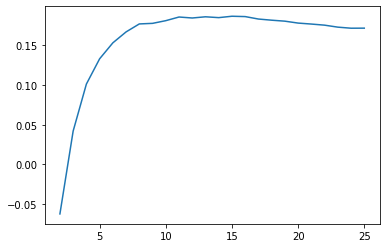

In [320]:
k_values=list(range(2, 26))
score = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    s = cross_val_score(model, X_train_fwd_final, y_train_fwd).mean()
    score.append(s)

plt.plot(k_values, score)

In [359]:
y_pred = knn_regressor.predict(X_test_fwd)
y_pred

array([5.85714286, 3.57142857, 3.57142857, 3.57142857, 3.57142857,
       4.42857143, 4.42857143, 4.42857143, 3.57142857, 3.57142857,
       3.57142857, 3.57142857, 3.57142857, 3.57142857, 3.57142857,
       3.57142857, 3.57142857, 3.57142857, 3.57142857, 3.57142857,
       3.57142857, 3.57142857, 3.57142857, 3.57142857, 3.57142857,
       3.57142857, 3.57142857, 3.57142857, 3.57142857, 3.57142857,
       5.14285714, 5.28571429, 5.28571429, 6.14285714, 6.14285714,
       5.57142857, 5.85714286, 5.85714286, 5.85714286, 5.85714286,
       5.71428571, 5.71428571, 6.71428571, 5.85714286, 5.28571429,
       6.        , 5.85714286, 4.42857143, 4.42857143, 4.42857143,
       5.14285714, 5.85714286, 5.85714286, 3.57142857, 3.57142857,
       3.57142857, 3.57142857, 3.57142857, 3.57142857, 5.85714286,
       5.14285714, 3.57142857, 3.57142857, 3.57142857, 3.57142857,
       3.57142857, 3.57142857, 3.57142857, 3.57142857, 3.57142857,
       5.85714286, 5.85714286, 5.85714286, 3.71428571, 3.71428

In [360]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test_fwd,y_pred)

3.79158191206384

In [317]:
for i,value in enumerate(y_pred):
    print(y_test_fwd.iloc[i],value)

0 4.0
0 4.0
0 4.0
0 4.0
1 4.0
0 4.0
0 3.8
0 4.6
0 4.6
1 5.2
0 5.0
0 4.4
0 5.2
0 5.2
0 5.0
0 5.4
0 5.0
0 4.6
0 1.6
0 5.2
0 5.0
0 5.0
0 5.0
0 5.0
0 5.0
0 5.0
0 5.0
0 5.0
0 5.0
0 5.0
1 6.6
1 6.6
8 4.6
2 6.4
0 6.2
1 6.2
2 6.2
0 4.8
0 4.0
0 4.0
11 4.8
2 3.4
13 3.4
2 3.4
0 3.4
0 6.2
1 6.2
1 4.8
0 6.2
1 6.6
1 5.0
1 5.0
0 5.0
0 5.0
0 5.2
0 5.0
1 4.4
1 4.4
1 4.4
0 3.6
0 4.6
0 6.2
0 5.4
1 4.0
0 4.0
0 4.0
0 4.0
0 4.0
1 4.0
0 4.4
0 6.2
0 6.6
0 6.6
0 6.6
0 6.6
0 6.6
0 5.0
0 5.8
0 4.0
0 4.0
0 4.4
0 6.2
0 6.4
0 4.0
0 4.8
0 4.8
0 4.8
0 4.0
0 4.8
0 1.6
0 6.2
0 6.2
0 6.6
0 6.6
0 1.8
1 4.0
1 4.0
1 3.8
0 6.4
1 6.4
2 4.0
0 4.0
0 4.0
0 4.0
0 4.0
0 4.0
0 4.0
0 4.0
0 4.0
0 4.0
0 5.2
0 6.6
1 6.6
2 6.6
1 6.6
2 6.0
2 5.0
5 5.0
5 5.0
2 5.0
0 5.2
11 6.6
8 5.8
1 4.4
2 3.4
1 3.4
2 3.4
0 6.0
0 6.6
2 6.6
0 6.2
0 6.2
1 6.6
1 6.6
1 6.2
2 6.2
13 6.2
0 4.6
0 4.6
0 5.2
0 4.0
5 4.0
1 3.8
0 7.2
0 7.2
0 4.6
0 4.4
0 6.2
0 5.4
0 4.0
0 3.8
0 4.6
0 4.6
0 5.2
0 5.0
0 5.0
0 5.0
0 5.0
0 5.0
0 5.0
0 5.0
0 5.0
0 1.6
0 1.6
0 4.4
0 4.6


### Train : DEF